In [1142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [1143]:
data = pd.read_csv('survey lung cancer.csv')
data.head

<bound method NDFrame.head of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1      

In [1144]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [1145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [1146]:
data.shape

(309, 16)

In [1147]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [1148]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [1149]:
data[data.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


---
# EDA

In [1150]:
data["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

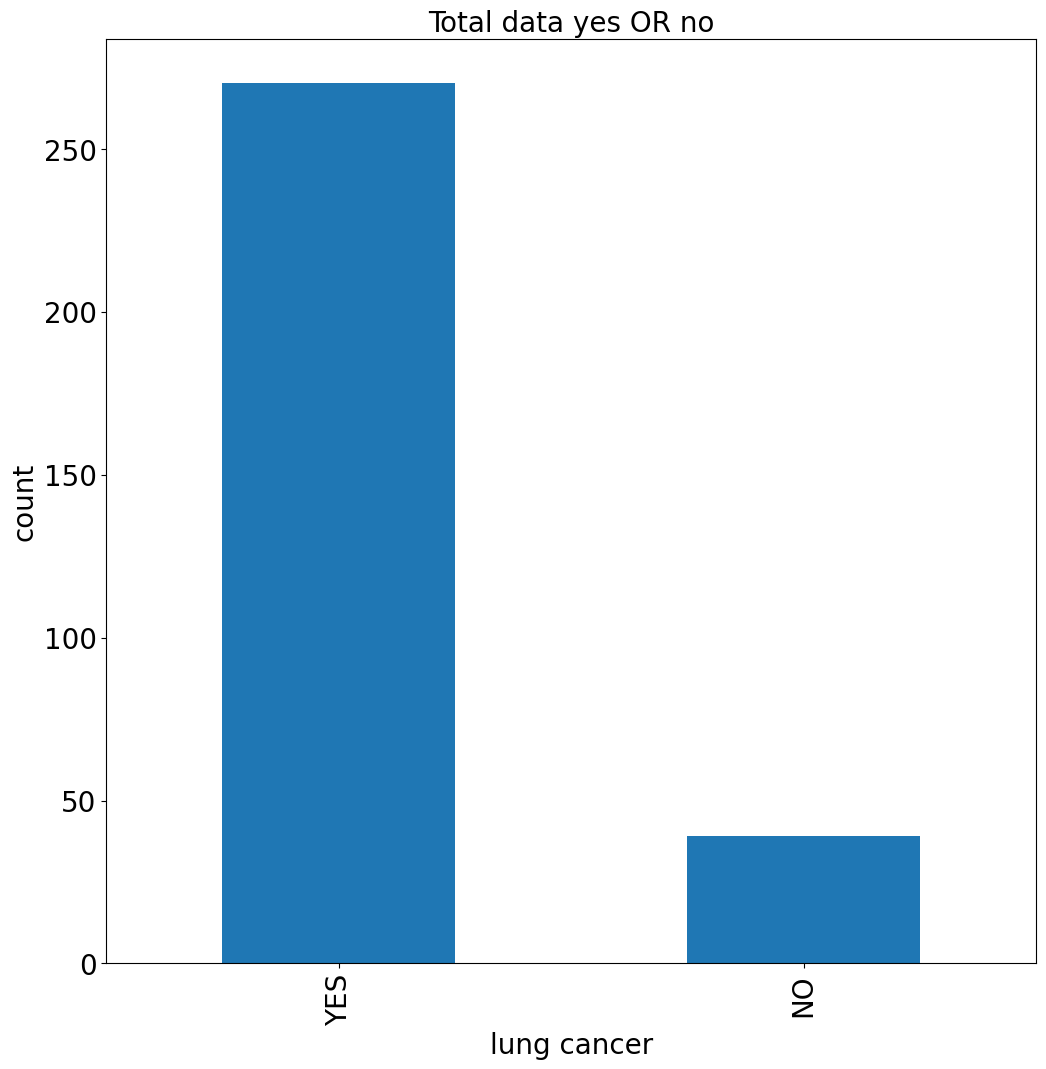

In [1151]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.title("Total data yes OR no",fontsize=20)
plt.xlabel("lung cancer", fontsize=20)
plt.ylabel("count",fontsize=20)
data["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=20)
plt.show()

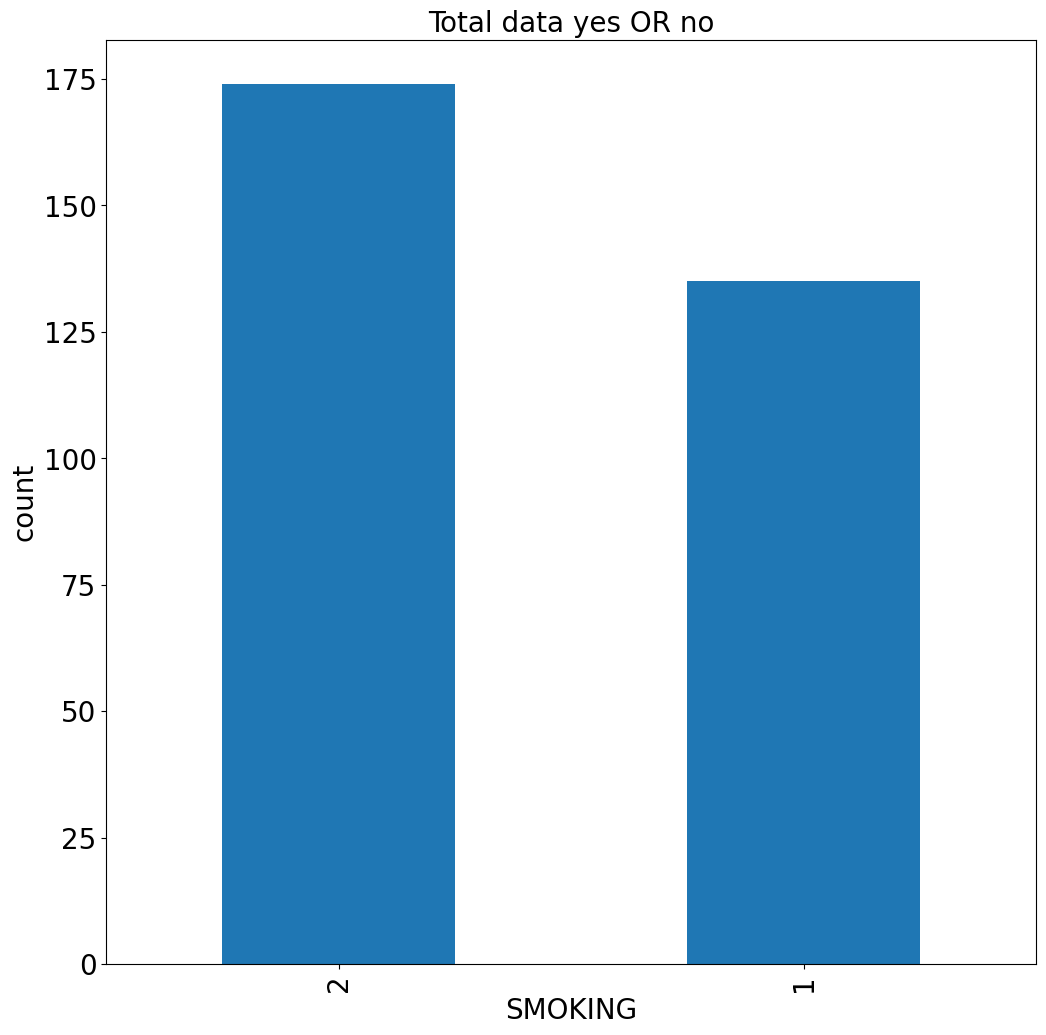

In [1152]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.title("Total data yes OR no",fontsize=20)
plt.xlabel("SMOKING", fontsize=20)
plt.ylabel("count",fontsize=20)
data["SMOKING"].value_counts().plot(kind= 'bar',fontsize=20)
plt.show()

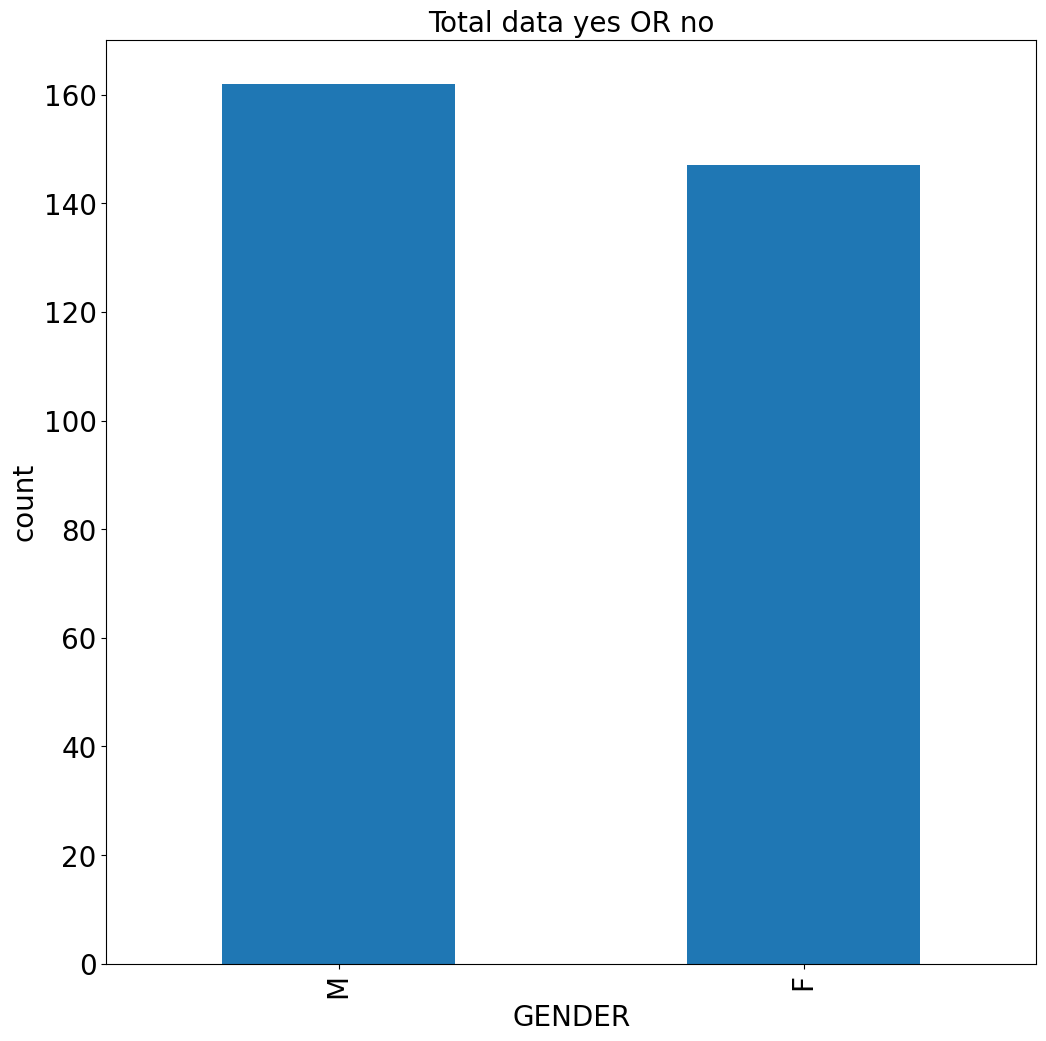

In [1153]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.title("Total data yes OR no",fontsize=20)
plt.xlabel("GENDER", fontsize=20)
plt.ylabel("count",fontsize=20)
data["GENDER"].value_counts().plot(kind= 'bar',fontsize=20)
plt.show()

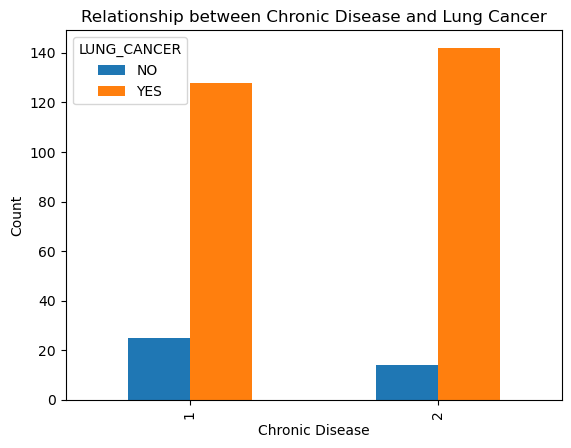

In [1154]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Assuming your dataset columns are named 'Chronic_Disease' and 'Lung_Cancer'
contingency_table = pd.crosstab(data['CHRONIC DISEASE'], data['LUNG_CANCER'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a bar graph
contingency_table.plot(kind='bar')

plt.title('Relationship between Chronic Disease and Lung Cancer')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')

plt.show()



In [1155]:
data.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES


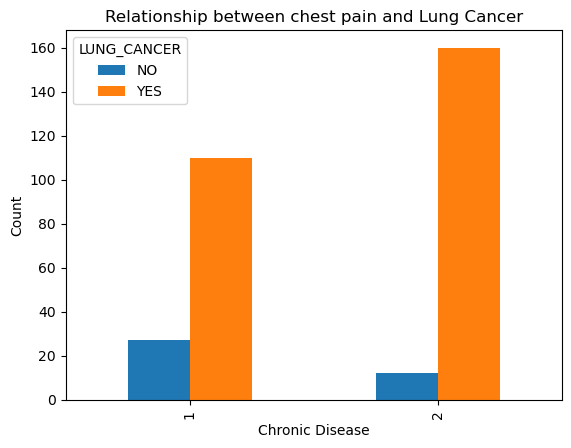

In [1156]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Assuming your dataset columns are named 'Chronic_Disease' and 'Lung_Cancer'
contingency_table = pd.crosstab(data['CHEST PAIN'], data['LUNG_CANCER'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a bar graph
contingency_table.plot(kind='bar')

plt.title('Relationship between chest pain and Lung Cancer')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')

plt.show()

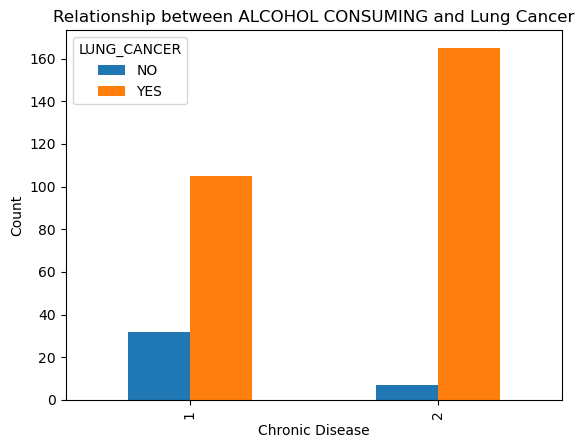

In [1157]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Assuming your dataset columns are named 'Chronic_Disease' and 'Lung_Cancer'
contingency_table = pd.crosstab(data['ALCOHOL CONSUMING'], data['LUNG_CANCER'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a bar graph
contingency_table.plot(kind='bar')

plt.title('Relationship between ALCOHOL CONSUMING and Lung Cancer')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')

plt.show()

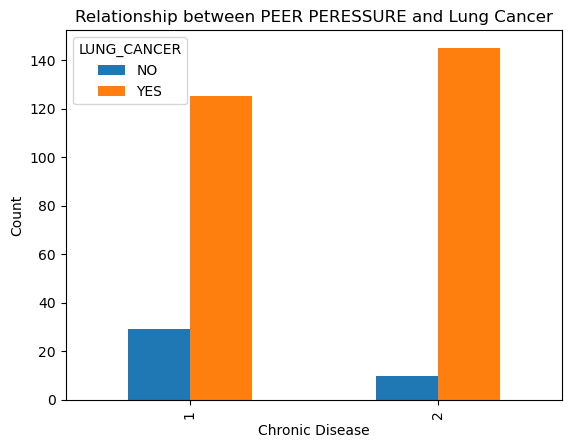

In [1158]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Assuming your dataset columns are named 'Chronic_Disease' and 'Lung_Cancer'
contingency_table = pd.crosstab(data['PEER_PRESSURE'], data['LUNG_CANCER'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a bar graph
contingency_table.plot(kind='bar')

plt.title('Relationship between PEER PERESSURE and Lung Cancer')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')

plt.show()

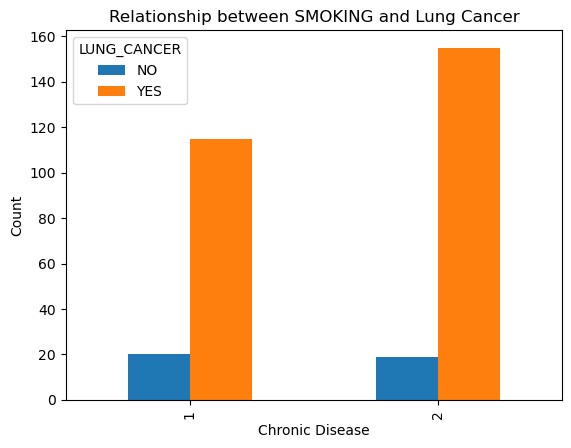

In [1159]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Assuming your dataset columns are named 'Chronic_Disease' and 'Lung_Cancer'
contingency_table = pd.crosstab(data['SMOKING'], data['LUNG_CANCER'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a bar graph
contingency_table.plot(kind='bar')

plt.title('Relationship between SMOKING and Lung Cancer')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')

plt.show()

---
# Label Encoding

In [1160]:
data['GENDER']=data['GENDER'].map({'M':1,'F':0})

In [1161]:
data['LUNG_CANCER']=data['LUNG_CANCER'].map({'YES':1,'NO':0})

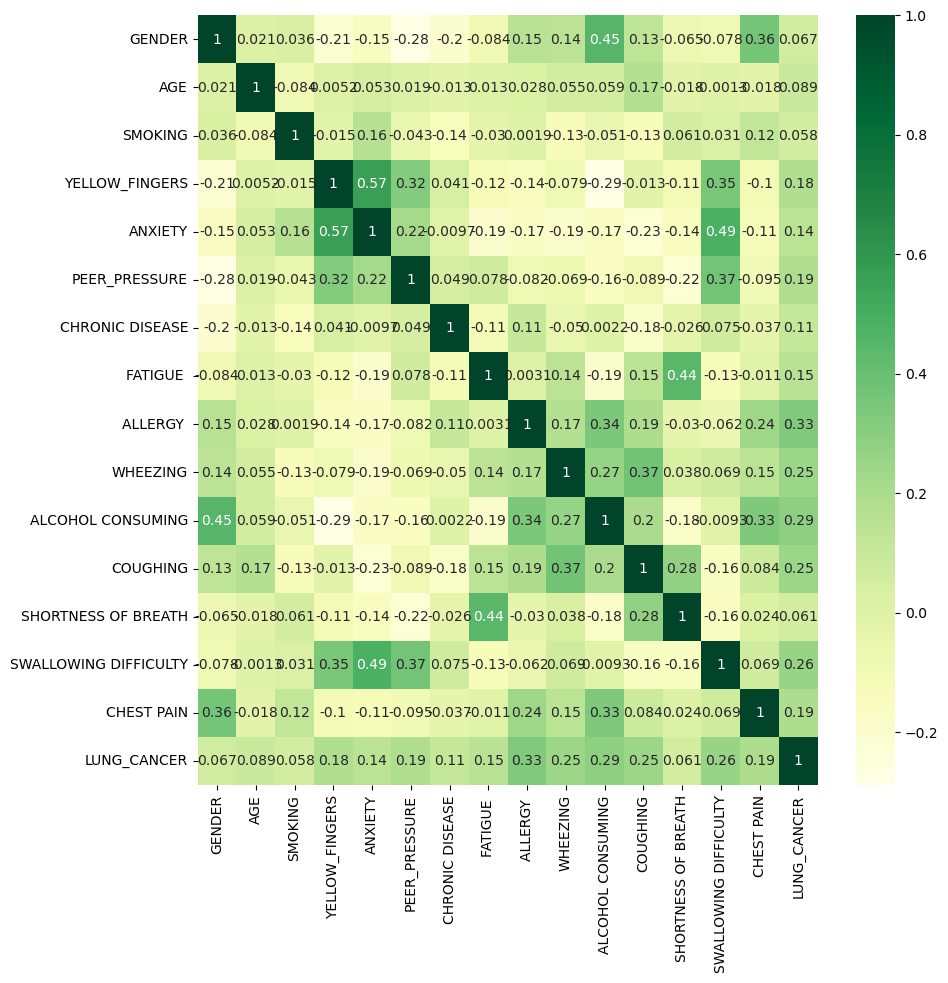

In [1162]:
corr = data.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sns.heatmap(data[features].corr(), annot=True, cmap='YlGn')

---
# EDA

In [1163]:
# Check duplicate data:
data.duplicated().sum()

33

In [1164]:
# Remove duplicate data:
data = data.drop_duplicates()

In [1165]:
data.duplicated().sum()

0

# LABEL ENCODING

In [1166]:
g = data.groupby('LUNG_CANCER')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df_balanced = df_balanced.reset_index(drop=True)


In [1167]:
df_balanced['LUNG_CANCER'].value_counts()

0    38
1    38
Name: LUNG_CANCER, dtype: int64

In [1168]:
X = df_balanced[['SMOKING','PEER_PRESSURE','ALCOHOL CONSUMING','CHEST PAIN','CHRONIC DISEASE']]
y = df_balanced['LUNG_CANCER']

In [1169]:
X

,SMOKING,PEER_PRESSURE,ALCOHOL CONSUMING,CHEST PAIN,CHRONIC DISEASE
0,2,1,1,1,1
1,2,1,1,2,2
2,1,1,1,1,2
3,1,1,1,1,1
4,2,2,1,2,1
...,...,...,...,...,...
71,2,2,1,2,1
72,1,2,2,2,1
73,2,1,2,2,1
74,2,2,2,2,2


# Random Forest Classifier

In [1170]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1171]:
# Initialize the Random Forest Classifier
r_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
r_forest.fit(X_train, y_train)

# Make predictions on the test data
predictions = r_forest.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test,predictions))

Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.43      0.38      0.40         8

    accuracy                           0.44        16
   macro avg       0.44      0.44      0.44        16
weighted avg       0.44      0.44      0.44        16



# Logistic Regression

In [1172]:
# Initialize the Logistic Regression model
logmodel = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logmodel.fit(X_train, y_train)

# Make predictions on the test data
predictions = logmodel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test,predictions))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.62      0.62      0.62         8

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16



# SAVING A MODEL

In [1173]:
# Save the model as a PKL file
import joblib
model_filename = 'logis_model.pkl'
joblib.dump(logmodel, model_filename)


['logis_model.pkl']

In [1174]:
# Save the model as a PKL file
import joblib
model_filename = 'forest_model.pkl'
joblib.dump(r_forest, model_filename)


['forest_model.pkl']